# 필요패키지 import

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
from torchvision.utils import make_grid

# GPU or CPU

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cpu


# Data Augmentation

In [ ]:
tain_transform =transforms.Compose([
                              transforms.RandomRotation(30),
                              transforms.RandomAffine(degrees=15, translate=(0.2,0.2), scale=(0.8, 1.2)), # 랜덤 affine변형
                              transforms.ColorJitter(brightness=0.2, contrast=0.2), # 색상 변경(bright: 밝기, constrast = 대비, saturation = 채도, hue = 색조)
                              transforms.RandomHorizontalFlip(),  # 랜덤으로 수평 뒤집기
                              transforms.RandomCrop(28,padding=6),  # padding만큼 둘러준 후, 랜덤하게 crop
                              transforms.ToTensor(),
                              transforms.Normalize(mean=(0.1307,), std=(0.3081,)),
])

In [16]:
tain_transform =transforms.Compose([
                              transforms.RandomRotation(30),
                              transforms.RandomAffine(degrees=15, translate=(0.2,0.2), scale=(0.8, 1.2)), # 랜덤 affine변형
                              transforms.ColorJitter(brightness=0.2, contrast=0.2), # 색상 변경(bright: 밝기, constrast = 대비, saturation = 채도, hue = 색조)
                              transforms.RandomHorizontalFlip(),  # 랜덤으로 수평 뒤집기
                              transforms.RandomCrop(28,padding=6),  # padding만큼 둘러준 후, 랜덤하게 crop
                              transforms.ToTensor(),
                              transforms.Normalize(mean=(0.1307,), std=(0.3081,)),
])

test_transform =transforms.Compose([  
                              transforms.ToTensor(),
                              transforms.Normalize(mean=(0.1307,), std=(0.3081,)),
])

# MNIST Data 불러오기

In [18]:
mnist_train = dsets.MNIST(root="MNIST_data/", 
                          train = True, 
                          transform =tain_transform,
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform = test_transform,
                         download=True)

# Data 확인

In [19]:
# train data 하나 확인(이미지 텐서 값과 레이블 값으로 구성)
mnist_train[0]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

In [20]:
img, label = mnist_train[0]
print(img.shape)
print(label)

torch.Size([1, 28, 28])
5


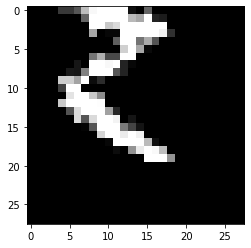

In [21]:
plt.imshow(img.reshape(28, 28), cmap="gray")

# 하이퍼파라미터 설정

In [22]:
batch_size = 64
test_batch_size = 1000
epochs = 10
lr = 0.01

# DataLoader

In [23]:
train_loader = DataLoader(dataset=mnist_train,
                          batch_size =64, 
                          shuffle=True)


test_loader = DataLoader(dataset=mnist_test,
                         batch_size=64, 
                         shuffle=False)

In [24]:
def show_batch(dl):
    for batch in dl:
        images,labels = batch
        fig, ax = plt.subplots(figsize=(7.5,7.5))
        ax.set_yticks([])
        ax.set_xticks([])
        ax.imshow(make_grid(images[:20],nrow=5).permute(1,2,0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


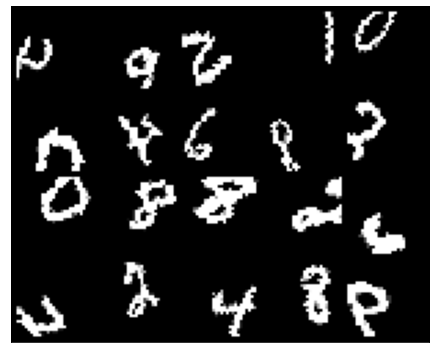

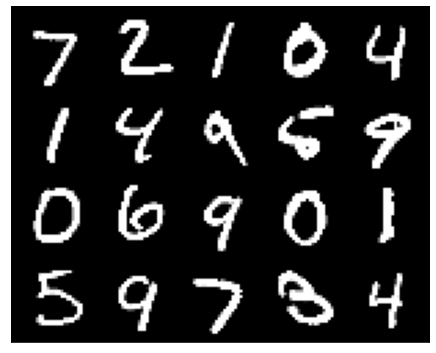

In [25]:
show_batch(train_loader)
show_batch(test_loader)

# 모델 설계(MLP)

## 단층

In [26]:
# MNIST데이터의 형태 : 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

## 다층

In [27]:
# 3층
model = nn.Sequential(nn.Linear(784,392),
                      nn.ReLU(),
                      
                      nn.Linear(392,196),
                      nn.ReLU(),
                      
                      nn.Linear(196,10)

                      )
model

Sequential(
  (0): Linear(in_features=784, out_features=392, bias=True)
  (1): ReLU()
  (2): Linear(in_features=392, out_features=196, bias=True)
  (3): ReLU()
  (4): Linear(in_features=196, out_features=10, bias=True)
)

In [28]:
# 5층
model1 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      
                      nn.Linear(512,256),
                      nn.ReLU(),
                       
                      nn.Linear(256,128),
                      nn.ReLU(),
                      
                      nn.Linear(128, 64),
                      nn.ReLU(),
                       
                      nn.Linear(64, 10)

                      )
model1

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
)

In [29]:
# 7층
model2 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      
                      nn.Linear(512,256),
                      nn.ReLU(),
                       
                      nn.Linear(256,128),
                      nn.ReLU(),
                      
                      nn.Linear(128, 64),
                      nn.ReLU(),
                       
                      nn.Linear(64, 32),
                      nn.ReLU(),
                       
                      nn.Linear(32, 16),
                      nn.ReLU(),
                       
                      nn.Linear(16, 10)
                      )


model2

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=32, bias=True)
  (9): ReLU()
  (10): Linear(in_features=32, out_features=16, bias=True)
  (11): ReLU()
  (12): Linear(in_features=16, out_features=10, bias=True)
)

# loss function & optimizer

In [30]:
# 비용함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(linear.parameters(),lr=0.01)

# Train & Test 함수 정의

In [31]:
def train(model, train_loader, optimizer, epoch, criterion):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
      data = data.view(-1,28*28).to(device)
      target = target.to(device)

      optimizer.zero_grad()

      output = model(data)

      loss = criterion(output, target)
      loss.backward()
      optimizer.step()

      if batch_idx % 200 == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.
              format(epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))

In [32]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
          data = data.view(-1,28*28).to(device)
          target = target.to(device)

          output = model(data)

          test_loss += criterion(output, target).item()
          pred = output.argmax(dim=1, keepdim=True)
          correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.
          format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))

# epoch별 Train & Test 확인

## 단층

In [33]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(linear.parameters(),lr=0.01)

In [34]:
for epoch in range(1, 11):
  
    train(linear, train_loader, optimizer, epoch, criterion)
    test(linear, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.409946
Train Epoch: 1 [12800/60000 (21%)]	Loss: 3.006895
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.755985
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.681141
Train Epoch: 1 [51200/60000 (85%)]	Loss: 3.005052

Test set: Average loss: 0.0445, Accuracy: 1238/10000 (12%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 3.135446
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.385656
Train Epoch: 2 [25600/60000 (43%)]	Loss: 3.054422
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.799398
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.576689

Test set: Average loss: 0.0483, Accuracy: 1376/10000 (14%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 3.088419
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.726068
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.629298
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.441172
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.570662

Test set: Average loss: 0.0439, Accuracy: 1351/10000 (14%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.872600
Train Epoch: 4 [12800/60000 (21%)]	Lo

## 다층

### MLP(3층)

In [ ]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
for epoch in range(1, 11):
    train(model, train_loader, optimizer, epoch, criterion)
    test(model, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.012088
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.321541
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.215315
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.241935
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.082413

Test set: Average loss: 0.0024, Accuracy: 9545/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.179903
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.040057
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.266039
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.041260
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.231553

Test set: Average loss: 0.0022, Accuracy: 9584/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.011876
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.437483
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.058582
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.046708
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.027255

Test set: Average loss: 0.0021, Accuracy: 9655/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.021598
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(5층)

In [ ]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model1.parameters(),lr=0.01)

In [ ]:
for epoch in range(1, 11):
    train(model1, train_loader, optimizer, epoch, criterion)
    test(model1, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303425
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.327149
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.354881
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.185581
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.177552

Test set: Average loss: 0.0039, Accuracy: 9403/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.230304
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.356279
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.114673
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.138678
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.133325

Test set: Average loss: 0.0026, Accuracy: 9628/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.020230
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.146549
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.035418
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.103247
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.212772

Test set: Average loss: 0.0022, Accuracy: 9686/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.007200
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(7층)

In [ ]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model2.parameters(),lr=0.01)

In [ ]:
for epoch in range(1, 11):
    train(model2, train_loader, optimizer, epoch, criterion)
    test(model2, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300503
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.476623
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.471882
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.304169
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.381841

Test set: Average loss: 0.0040, Accuracy: 9363/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.183102
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.163592
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.144590
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.106387
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.104623

Test set: Average loss: 0.0033, Accuracy: 9571/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.161282
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.029236
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.159784
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.511578
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.206557

Test set: Average loss: 0.0025, Accuracy: 9644/10000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.098382
Train Epoch: 4 [12800/60000 (21%)]	Lo

# Test

## 단층

Accuracy: 0.8460999727249146
Label: 3
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


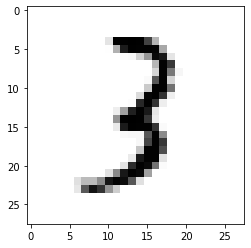

In [ ]:
with torch.no_grad():  
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)

 
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())



  ######시각화(visualization)######

  r = random.randint(0, len(mnist_test)-1)

  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())

  single_prediction = linear(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()

## 다층

### MLP(3층)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9664999842643738
Label: 3
Prediction:  3


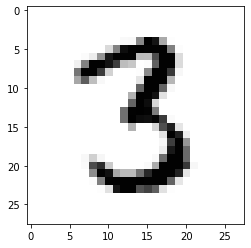

In [ ]:
with torch.no_grad():  
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)

 
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())



  ######시각화(visualization)######

  r = random.randint(0, len(mnist_test)-1)

  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())

  single_prediction = model(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()

### MLP(5층)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9491999745368958
Label: 6
Prediction:  6


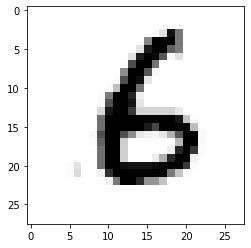

In [ ]:
with torch.no_grad():  
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model1(X_test)

 
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())



  ######시각화(visualization)######

  r = random.randint(0, len(mnist_test)-1)

  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())

  single_prediction = model1(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()

### MLP(7층)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.7357000112533569
Label: 9
Prediction:  8


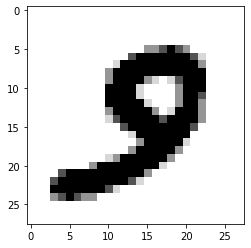

In [ ]:
with torch.no_grad():  
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model2(X_test)

 
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())



  ######시각화(visualization)######

  r = random.randint(0, len(mnist_test)-1)

  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())

  single_prediction = model2(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()